# Regression with QNeighborsRegressor

In [1]:
from qcware import forge
# this line is for internal tracking; it is not necessary for use!
forge.config.set_environment_source_file('regression.ipynb')

from qcware.forge.qml import fit_and_predict
import numpy as np
import matplotlib.pyplot as plt 

### Generate data

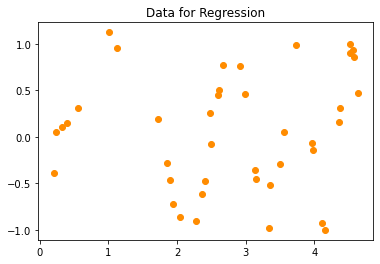

In [2]:
data_x = np.sort(5 * np.random.rand(40))
data_values = np.sin(data_x**2).ravel()

# Add noise to data
data_values[::5] += 1 * (0.5 - np.random.rand(8))

regression_x = np.linspace(0, 5, 501)

data_x = data_x.reshape(-1, 1)
regression_x = regression_x.reshape(-1, 1)

plt.scatter(data_x, data_values, color='darkorange')
plt.title('Data for Regression')
plt.show()

### Perform quantum regression

In [3]:
n_neighbors = 5
qlabels = fit_and_predict(
    data_x,
    y=data_values,
    T=regression_x, 
    model='QNeighborsRegressor', 
    parameters={'n_neighbors': n_neighbors}
)

### Visualize results

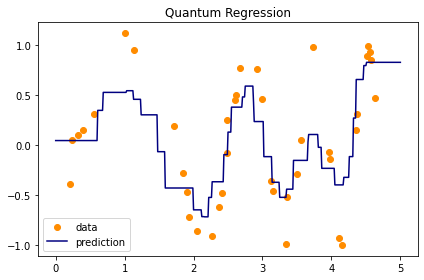

In [4]:
plt.scatter(data_x, data_values, color='darkorange', label='data')
plt.plot(regression_x, qlabels, color='navy', label='prediction')
plt.axis('tight')
plt.legend()
plt.title('Quantum Regression')
plt.tight_layout()
plt.show()

In [5]:
regression_x

array([[0.  ],
       [0.01],
       [0.02],
       [0.03],
       [0.04],
       [0.05],
       [0.06],
       [0.07],
       [0.08],
       [0.09],
       [0.1 ],
       [0.11],
       [0.12],
       [0.13],
       [0.14],
       [0.15],
       [0.16],
       [0.17],
       [0.18],
       [0.19],
       [0.2 ],
       [0.21],
       [0.22],
       [0.23],
       [0.24],
       [0.25],
       [0.26],
       [0.27],
       [0.28],
       [0.29],
       [0.3 ],
       [0.31],
       [0.32],
       [0.33],
       [0.34],
       [0.35],
       [0.36],
       [0.37],
       [0.38],
       [0.39],
       [0.4 ],
       [0.41],
       [0.42],
       [0.43],
       [0.44],
       [0.45],
       [0.46],
       [0.47],
       [0.48],
       [0.49],
       [0.5 ],
       [0.51],
       [0.52],
       [0.53],
       [0.54],
       [0.55],
       [0.56],
       [0.57],
       [0.58],
       [0.59],
       [0.6 ],
       [0.61],
       [0.62],
       [0.63],
       [0.64],
       [0.65],
       [0.